Julius Aditya
220711892
Bokeh
Mengklsifikasi Anggur Merah, Concord, dan Thompson

In [3]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
#load data
data_dir = r"C:\Users\LENOVO LEGION\Videos\TUBESMLUAS\train_data" 
#Randomize data yang telah di load sekaligus resize menjadi 180 x 180
data = tf.keras.utils.image_dataset_from_directory(data_dir,seed = 123, image_size=(180,180), batch_size=16)
###Terdapat code yang hilang disini! lihat modul untuk menemukanya

print(data.class_names)

class_names = data.class_names

img_size = 180
batch = 32
validation_split = 0.1
dataset = tf.keras.utils. image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch,
)
total_count = len(dataset)
val_count = int(total_count * validation_split)
train_count = total_count - val_count

print("Total Images:", total_count)
print("Train Images:", train_count)
print("Validation Images:", val_count)

train_ds = dataset.take(train_count)
val_ds = dataset.skip(train_count)


Found 300 files belonging to 3 classes.
['Concord', 'Merah', 'Thompson']
Found 300 files belonging to 3 classes.
Total Images: 10
Train Images: 9
Validation Images: 1


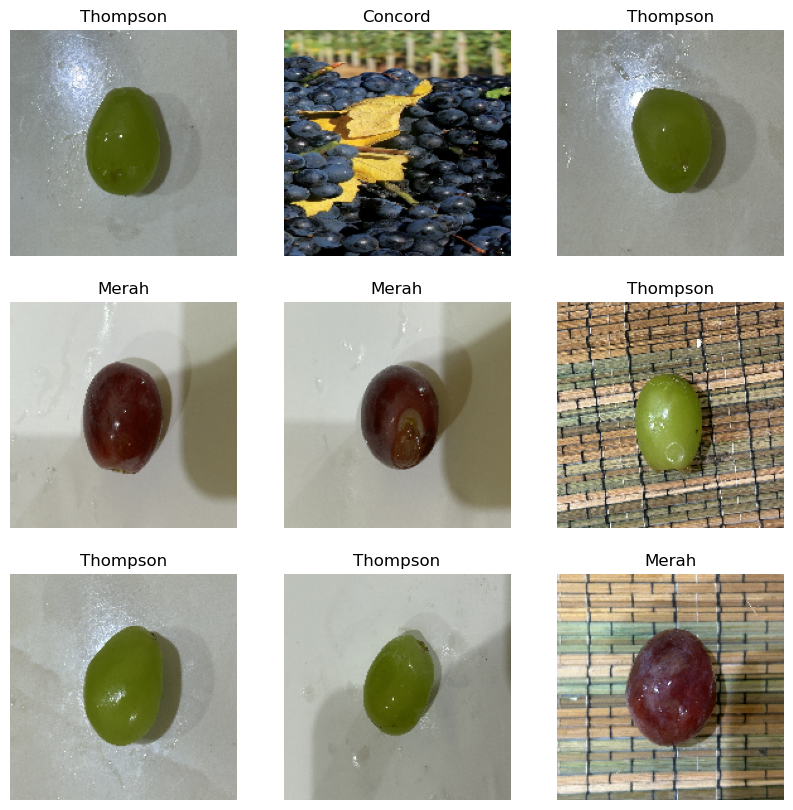

In [4]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [5]:
for images, labels in train_ds.take(1):
    images_array = np.array(images)
    print(images_array.shape)

(32, 180, 180, 3)


c:\Users\LENOVO LEGION\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


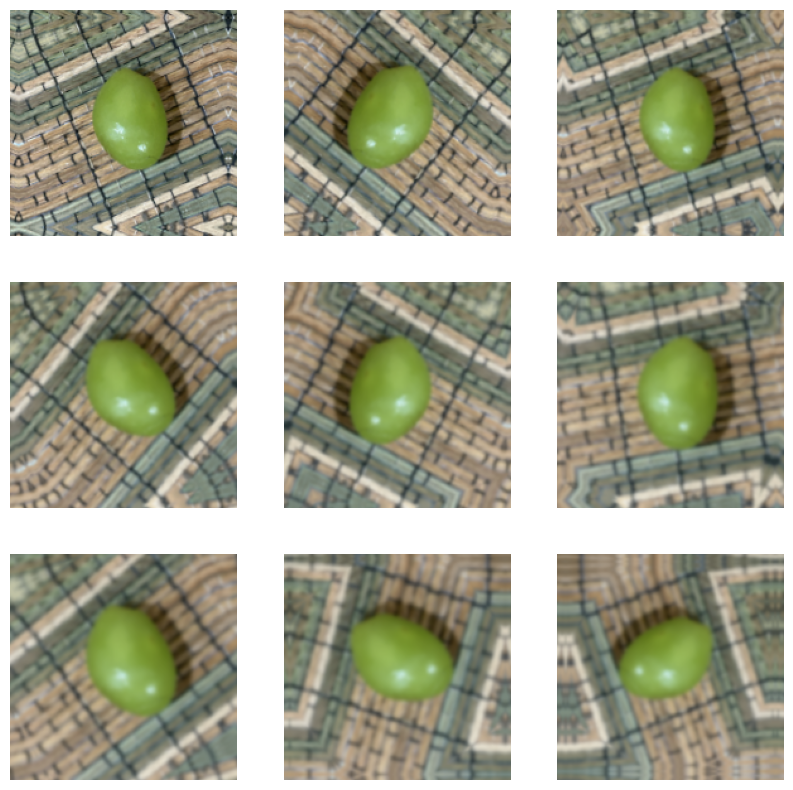

In [6]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

Tuner = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = Tuner)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = Tuner)

#Augmentasi data dengan menggunakan Sequential
###Terdapat code yang hilang disini! lihat modul untuk menemukanya
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape= (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

i = 0
plt.figure(figsize=(10,10))
#Lihat data setelah di augmentasi
for images, labels in train_ds.take(69):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [21]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Fungsi model AlexNet
def alexnet(input_shape, n_classes):
    input = Input(input_shape)
    
    # Layer 1
    x = Conv2D(96, (11, 11), strides=4, activation='relu', padding='valid')(input)
    x = MaxPool2D((3, 3), strides=2)(x)
    
    # Layer 2
    x = Conv2D(256, (5, 5), activation='relu', padding='same')(x)
    x = MaxPool2D((3, 3), strides=2)(x)
    
    # Layer 3
    x = Conv2D(384, (3, 3), activation='relu', padding='same')(x)
    
    # Layer 4
    x = Conv2D(384, (3, 3), activation='relu', padding='same')(x)
    
    # Layer 5
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPool2D((3, 3), strides=2)(x)
    
    # Flatten
    x = Flatten()(x)
    
    # Fully connected layers
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(1000, activation='relu')(x)
    
    # Output layer
    output = Dense(n_classes, activation='softmax')(x)
    
    # Model
    model = Model(input, output)
    return model

# Definisikan input shape dan jumlah kelas
input_shape = (227, 227, 3)  # AlexNet menggunakan gambar 227x227
n_classes = 3  # Ubah sesuai dengan dataset Anda (jumlah kelas)

# Buat model AlexNet
model = alexnet(input_shape, n_classes)
model.summary()

# Compile model
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Data preprocessing
datagen = ImageDataGenerator(rescale=1./255)  # Normalisasi data
val_datagen = ImageDataGenerator(rescale=1./255)

# Load dataset
train_ds = datagen.flow_from_directory(
    r'C:\Users\LENOVO LEGION\Videos\TUBESMLUAS\train_data',  # Ganti dengan path dataset pelatihan Anda
    target_size=(227, 227),  # Ukuran gambar sesuai AlexNet
    batch_size=32,
    class_mode='sparse'  # Gunakan sparse untuk label integer
)

val_ds = val_datagen.flow_from_directory(
    r'C:\Users\LENOVO LEGION\Videos\TUBESMLUAS\test_data',  # Ganti dengan path dataset validasi Anda
    target_size=(227, 227),  # Ukuran gambar sesuai AlexNet
    batch_size=32,
    class_mode='sparse'
)

# Callback Early Stopping
early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=5, 
    mode='max'
)

# Fit model menggunakan dataset dengan validasi
history = model.fit(
    train_ds,  # Data pelatihan
    epochs=30,  # Maksimum epoch
    validation_data=val_ds,  # Data validasi
    callbacks=[early_stopping],  # Callback early stopping
    verbose=1  # Tampilkan log pelatihan
)


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 227, 227, 3)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_62 (Conv2D)              │ (None, 55, 55, 96)        │     34,944 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 27, 27, 96)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_63 (Conv2D)              │ (None, 27, 27, 256)       │    614,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 13, 13, 256)       │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_64 (Conv2D)              │ (None, 13, 13, 384)       │    885,120 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_65 (Conv2D)              │ (None, 13, 13, 384)       │  1,327,488 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_66 (Conv2D)              │ (None, 13, 13, 256)       │    884,992 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 6, 6, 256)         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_5 (Dense)                 │ (None, 4096)              │ 37,752,832 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_6 (Dense)                 │ (None, 4096)              │ 16,781,312 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_4 (Dropout)             │ (None, 4096)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_7 (Dense)                 │ (None, 1000)              │  4,097,000 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_8 (Dense)                 │ (None, 3)                 │      3,003 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 62,381,347 (237.97 MB)

 Trainable params: 62,381,347 (237.97 MB)

 Non-trainable params: 0 (0.00 B)

Found 300 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.3564 - loss: 1.2833 - val_accuracy: 0.3333 - val_loss: 1.0993
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.3342 - loss: 1.1019 - val_accuracy: 0.3333 - val_loss: 1.0985
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.3462 - loss: 1.0918 - val_accuracy: 0.3333 - val_loss: 1.2755
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4247 - loss: 1.0748 - val_accuracy: 0.3333 - val_loss: 1.0925
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.3857 - loss: 1.0897 - val_accuracy: 0.3333 - val_loss: 1.0817
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4407 - loss: 1.0092 - val_accuracy: 0.6667 - val_loss: 0.7122
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5615 - loss: 0.7364 - val_accuracy: 0.6667 - val_loss: 0.6051
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━

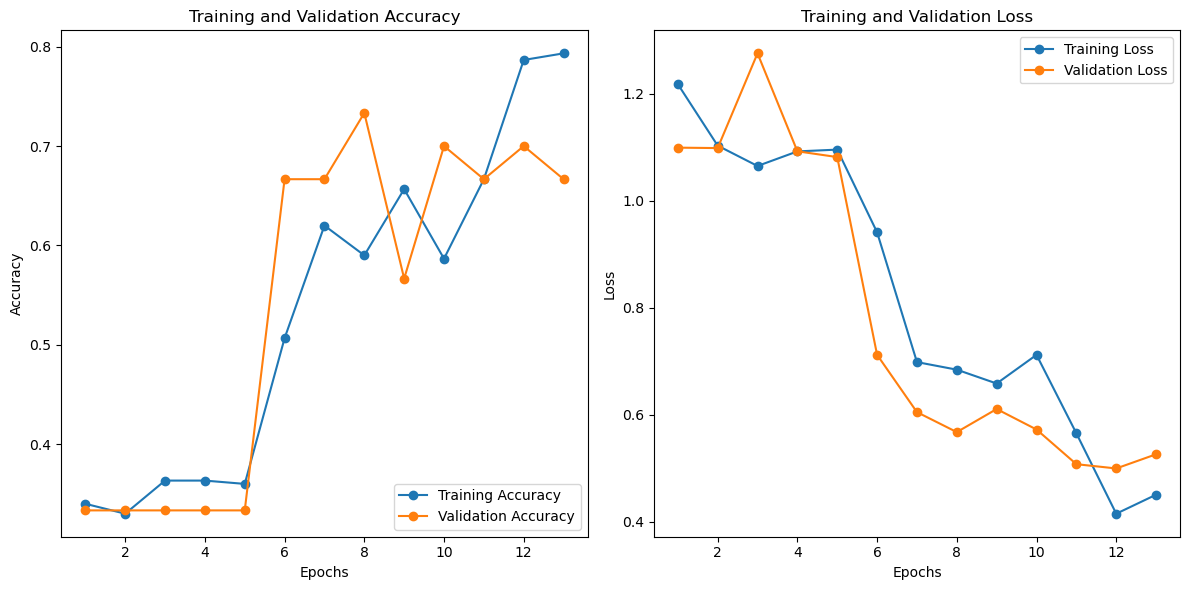

In [22]:
import matplotlib.pyplot as plt

# Pastikan history telah dihasilkan dari pelatihan model
epochs_range = range(1, len(history.history['loss']) + 1)

# Plot Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss', marker='o')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Display the plots
plt.tight_layout()
plt.show()


In [23]:
model.save('alexnet.h5')

c:\Users\LENOVO LEGION\anaconda3\Lib\site-packages\keras\src\models\model.py:342: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  warnings.warn(


In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

# Load the trained model
model = load_model(r'C:\Users\LENOVO LEGION\Videos\TUBESMLUAS\alexnet.h5')  # Ganti dengan path model Anda
class_names = ['Concord', 'Merah', 'Thompson']

# Function to classify images and save the original image
def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        # Load and preprocess the image
        input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))
        input_image_array = tf.keras.utils.img_to_array(input_image)
        input_image_exp_dim = tf.expand_dims(input_image_array, 0)  # Add batch dimension

        # Predict
        predictions = model.predict(input_image_exp_dim)
        result = tf.nn.softmax(predictions[0])
        class_idx = np.argmax(result)
        confidence = np.max(result) * 100

        # Display prediction and confidence in notebook
        print(f"Prediksi: {class_names[class_idx]}")
        print(f"Confidence: {confidence:.2f}%")

        # Save the original image (without text)
        input_image = Image.open(image_path)
        input_image.save(save_path)

        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"

result = classify_images(r'test_data\Merah\Merah_Grape_Original_Data03.JPG', save_path='merah2.jpg')
print(result)


Terjadi kesalahan: Input 0 of layer "functional_5" is incompatible with the layer: expected shape=(None, 227, 227, 3), found shape=(1, 180, 180, 3)


Found 30 files belonging to 3 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


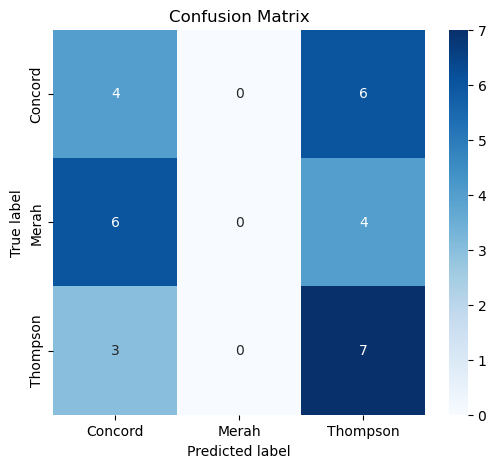

Confusion Matrix:
 [[4 0 6]
 [6 0 4]
 [3 0 7]]
Akurasi:  0.36666666666666664
Presisi:  [0.30769231        nan 0.41176471]
Recall: [0.4 0.  0.7]
F1 Score:  [0.34782609        nan 0.51851852]


In [28]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

# Muat data test yang sebenarnya
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'test_data',  # Ganti dengan path ke folder data uji Anda
    labels='inferred',
    label_mode='categorical',  # Menghasilkan label dalam bentuk one-hot encoding
    batch_size=32,
    image_size=(227, 227)  # Sesuaikan dengan input ukuran AlexNet
)

# Muat model AlexNet
model = load_model(r'C:\Users\LENOVO LEGION\Videos\TUBESMLUAS\alexnet.h5')  # Ganti dengan path model Anda

# Prediksi model
y_pred = model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)  # Konversi ke kelas prediksi

# Ekstrak label sebenarnya dari test_data dan konversi ke bentuk indeks kelas
true_labels = []
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())  # Konversi one-hot ke indeks kelas
true_labels = tf.convert_to_tensor(true_labels)

# Membuat matriks kebingungan
conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)

# Menghitung akurasi
accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

# Menghitung presisi dan recall
precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)

# Menghitung F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Concord", "Merah", "Thompson"], yticklabels=["Concord", "Merah", "Thompson"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

print("Confusion Matrix:\n", conf_mat.numpy())
print("Akurasi: ", accuracy.numpy())
print("Presisi: ", precision.numpy())
print("Recall:", recall.numpy())
print("F1 Score: ", f1_score.numpy())
